In [2]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer

### Reading the csv files

In [5]:
df=pd.read_csv('train.csv')
dftest=pd.read_csv('test.csv')


### Categories with missing colums


In [6]:
df.columns[df.isnull().any()]
miss=df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
print(miss)


Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64


### Visualising missing data

In [7]:
miss=miss.to_frame()
miss.columns=['count']
miss.index.names=['Name']
miss['Name']=miss.index

### Plotting missing data

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


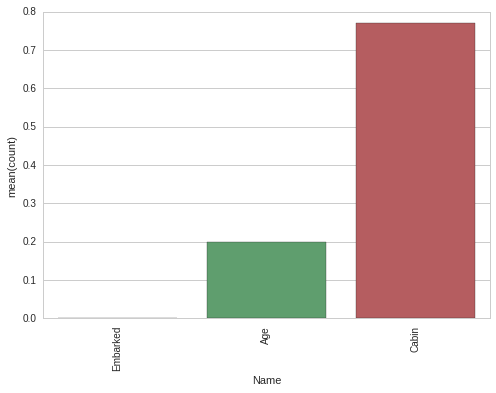

In [10]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()


### Converting Categorial to Numeric data


In [23]:
discrete=['Sex','Embarked']
LE=LabelEncoder()
df = df.replace(np.nan, 'NaN')
dftest = dftest.replace(np.nan,'NaN')
for col in discrete:
	LE.fit(df[col].astype(str))
	df[col]=LE.transform(df[col])
	dftest[col]=LE.transform(dftest[col])

 ### Data imputation

In [24]:

df['Age']=df['Age'].replace('NaN',df['Age'].median())
dftest['Age']=dftest['Age'].replace('NaN',dftest['Age'].median())
X,y=df.drop('Survived',axis=1),df.Survived
dftest=dftest.astype(float)

### Data cleaning

In [25]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(dftest)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.5,0.0,0.0,7.8292,2.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,3.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,2.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,3.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,3.0
5,3.0,1.0,14.0,0.0,0.0,9.2250,3.0
6,3.0,0.0,30.0,0.0,0.0,7.6292,2.0
7,2.0,1.0,26.0,1.0,1.0,29.0000,3.0
8,3.0,0.0,18.0,0.0,0.0,7.2292,0.0
9,3.0,1.0,21.0,2.0,0.0,24.1500,3.0


### Random forest classifier

In [27]:
RFC = RandomForestClassifier(n_estimators=530, random_state = 2017 , oob_score = 'TRUE',criterion='entropy',max_features='sqrt') 
RFC.fit(X,y)
preds = RFC.predict(dftest)
print(preds)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


### Saving results in csv file

In [28]:
preds = pd.DataFrame(preds).reset_index()
preds.columns = ['PassengerId','Survived']
preds['PassengerId']=df_
preds.to_csv('solution.csv', index = False)